In [ ]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math
from google.colab import files
from datetime import datetime
import warnings
import requests
import matplotlib.animation as animation


In [ ]:
uploaeded=files.upload()

Saving final.xlsx to final (1).xlsx


In [ ]:
doc='/content/final.xlsx'

In [ ]:
datos = pd.read_excel('/content/final.xlsx')

In [ ]:
df = pd.read_excel(doc)
df

###Analisis exploratorio

In [ ]:
df.columns[4:]

Index(['masa_kg', 'estatura_cm', 'envergadura_cm', 'longitud_pie_cm',
       'triceps_mm', 'subescapular_mm', 'biceps_mm', 'cresta_iliaca_mm',
       'supraespinal_mm', 'abdominal_mm', 'muslo_fron_abc_mm',
       'pantorrilla_medial_mm', 'cefalico_cm', 'brazo_relajado_cm',
       'brazo_contraido_90_cm', 'antebrazo_cm', 'muneca_cm',
       'torax_mesoesternal_cm', 'cintura_cm', 'cadera_max_cm', 'muslo_1cm_cm',
       'muslo_medio_cm', 'pantorrilla_maxima_cm', 'tobillo_minimo_cm',
       'biacromial_cm', 'biiliocrestal_cm', 'biestiloideo_cm', 'humero_cm',
       'femur_rodilla_cm', 'wells1', 'wells2', 'hombros1', 'hombros2',
       'abdominales_60s', 'lagartijas_60s', 'reaccion1_tiempo_seg',
       'reaccion2_tiempo_seg', 'aceleracion1_tiempo_seg',
       'aceleracion2_tiempo_seg', 'cmj_tiempo1_seg', 'cmj_altura1_pulg',
       'cmj_tiempo2_seg', 'cmj_altura2_pulg', 'sj_tiempo1_seg',
       'sj_altura1_pulg', 'sj_tiempo2_seg', 'sj_altura2_pulg',
       'dj_tiempo1_seg', 'dj_altura1_pulg'

In [ ]:
for col in df.columns[4:]:
  df[col] = df[col].replace(',', '.', regex=True)
  df[col]=df[col].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   nombre                         18 non-null     int64         
 1   fecha_evaluacion               15 non-null     datetime64[ns]
 2   genero                         18 non-null     object        
 3   fecha_nacimiento               17 non-null     datetime64[ns]
 4   masa_kg                        15 non-null     float64       
 5   estatura_cm                    15 non-null     float64       
 6   envergadura_cm                 15 non-null     float64       
 7   longitud_pie_cm                15 non-null     float64       
 8   triceps_mm                     15 non-null     float64       
 9   subescapular_mm                15 non-null     float64       
 10  biceps_mm                      15 non-null     float64       
 11  cresta_iliaca_mm     

### Pairplots

In [ ]:
df1=df[['masa_kg', 'estatura_cm', 'envergadura_cm', 'longitud_pie_cm','triceps_mm','genero']]

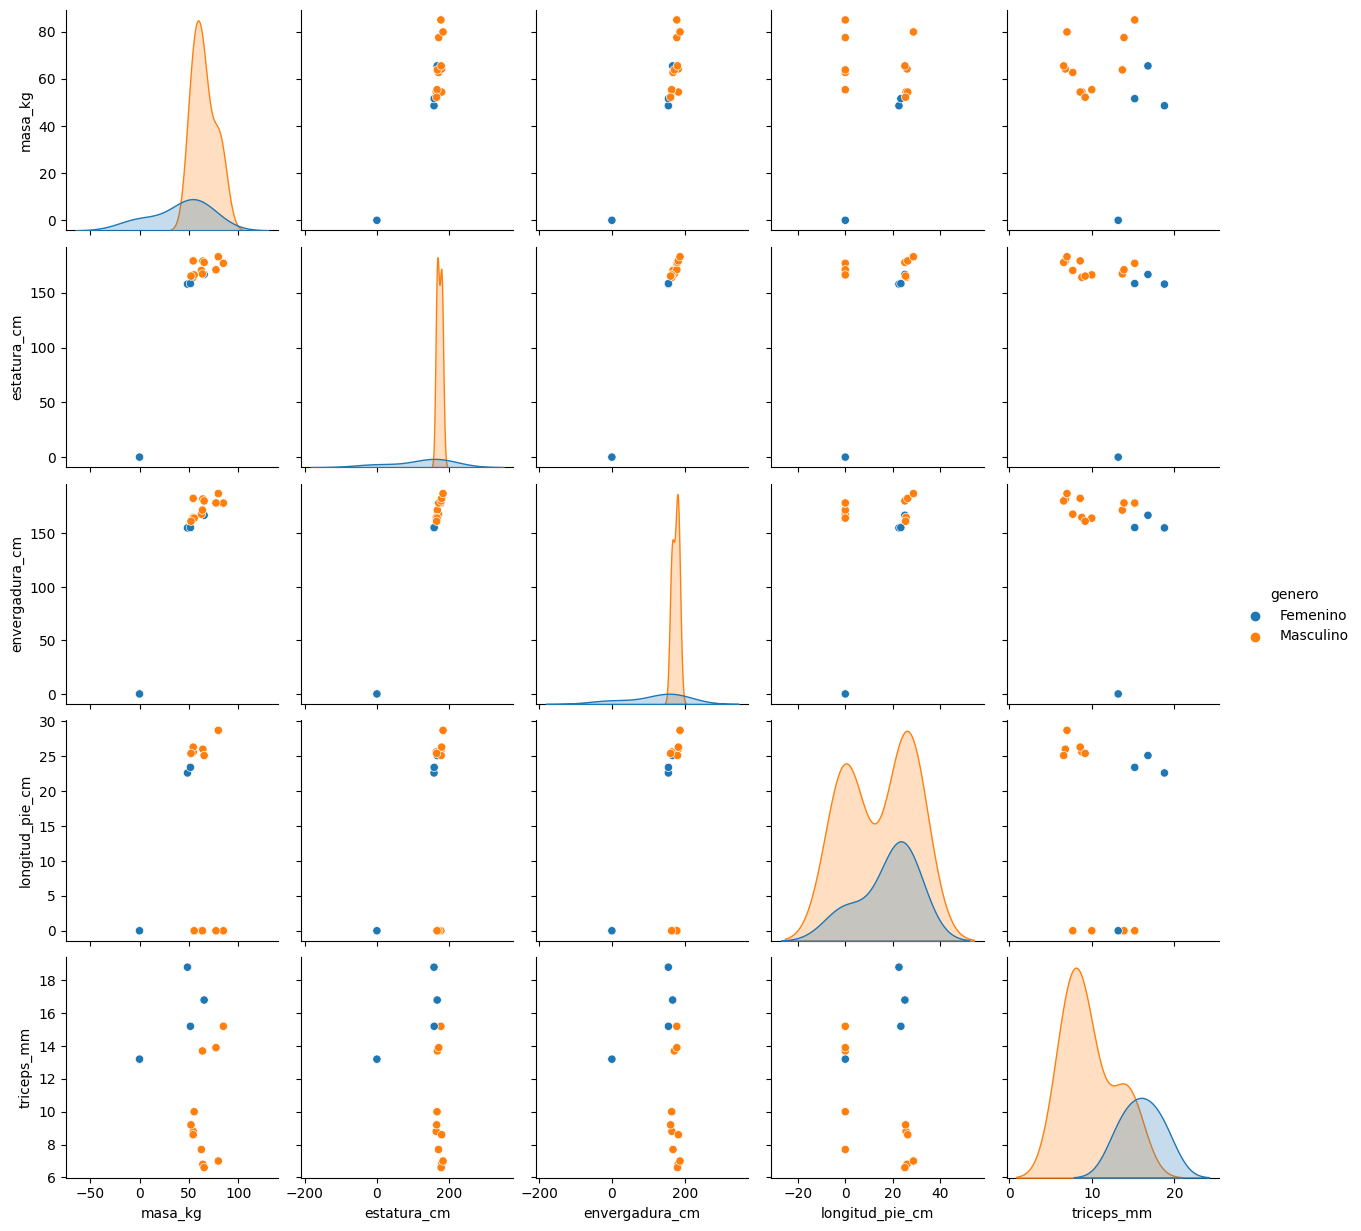

In [ ]:
sn.pairplot(df1, hue="genero")

In [ ]:
df1a=df[['masa_kg', 'estatura_cm', 'envergadura_cm', 'longitud_pie_cm','triceps_mm','Desempeño']]

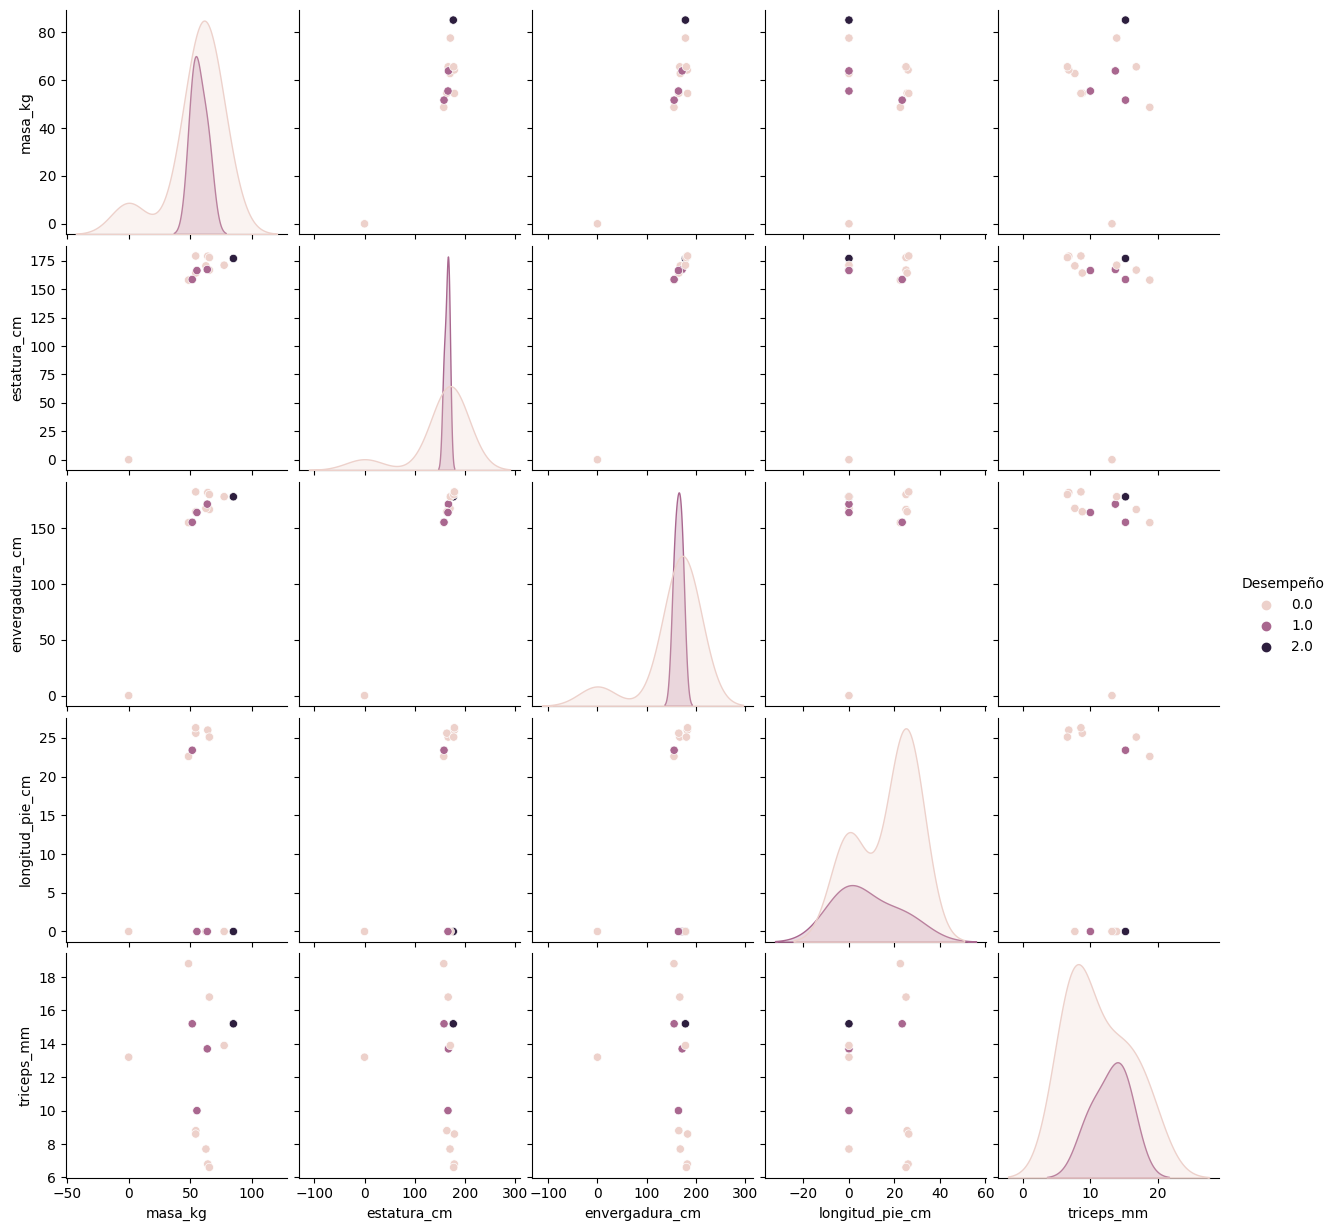

In [ ]:
sn.pairplot(df1a, hue="Desempeño")

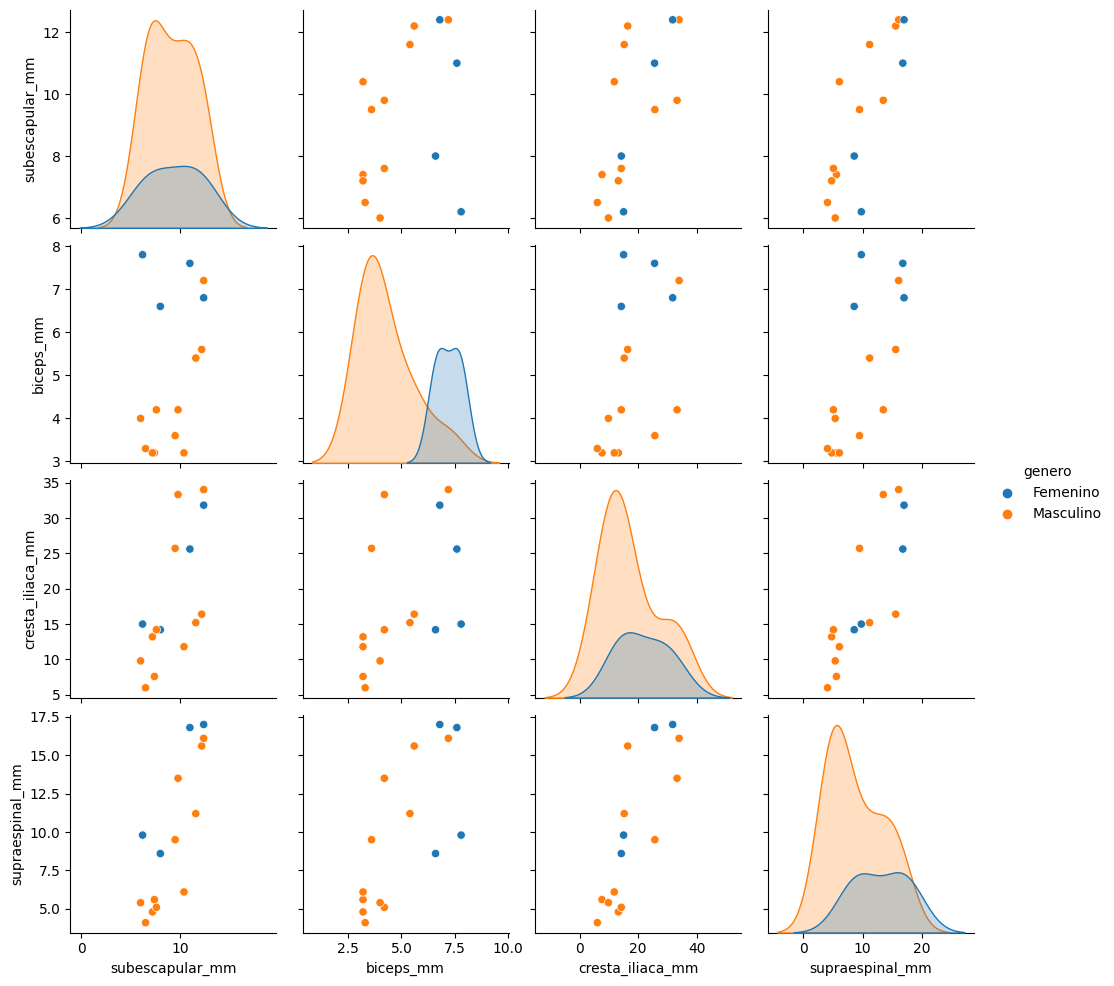

In [ ]:
df2=df[['subescapular_mm', 'biceps_mm', 'cresta_iliaca_mm',
       'supraespinal_mm','genero']]
sn.pairplot(df2, hue="genero")

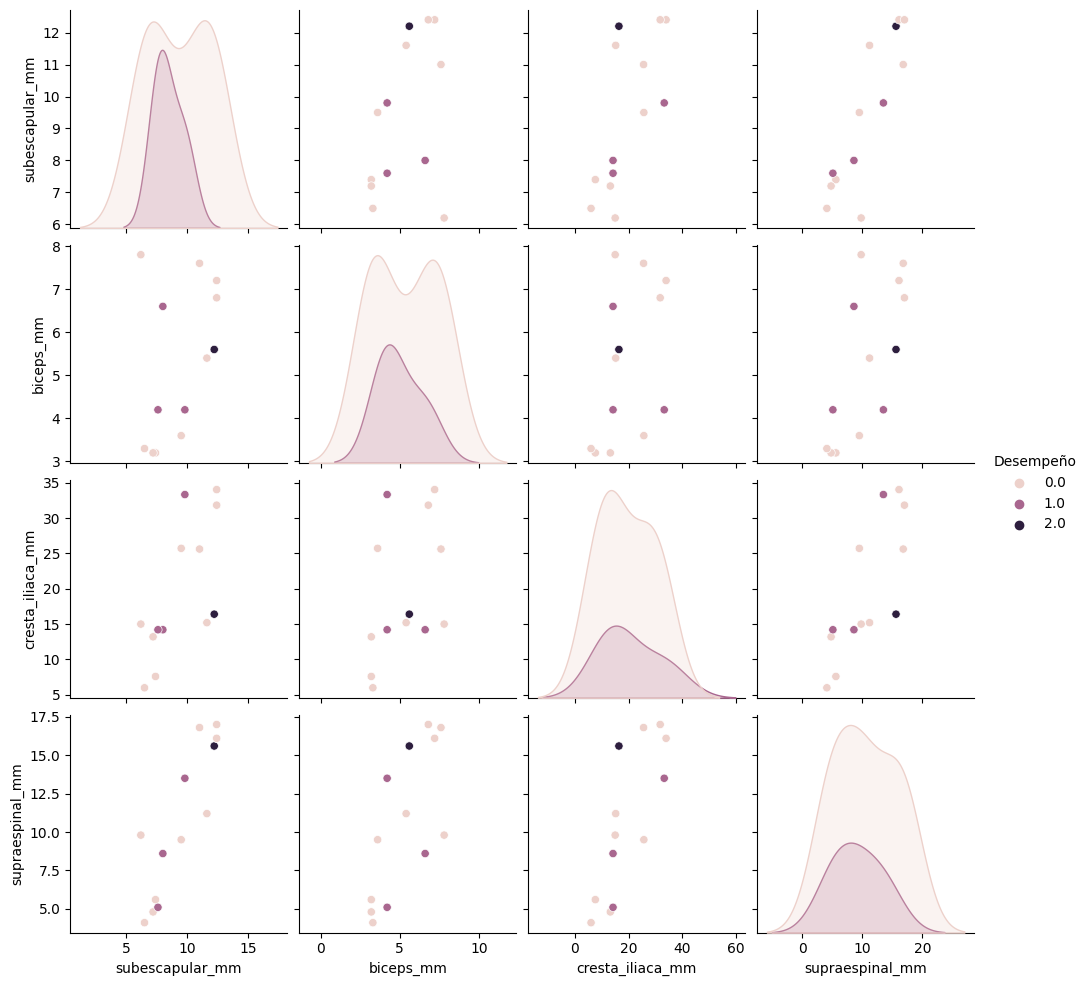

In [ ]:
df2a=df[['subescapular_mm', 'biceps_mm', 'cresta_iliaca_mm',
       'supraespinal_mm','Desempeño']]
sn.pairplot(df2a, hue="Desempeño")

In [ ]:
df['aceleracion2_tiempo_seg'].describe()

count      14.000000
mean      136.885714
std       506.020115
min         1.380000
25%         1.630000
50%         1.700000
75%         1.730000
max      1895.000000
Name: aceleracion2_tiempo_seg, dtype: float64

### DataFrames separados 

In [ ]:
xda=df.loc[:,:'fecha_nacimiento']
xda

,nombre,fecha_evaluacion,genero,fecha_nacimiento
0,1,2014-03-25,Femenino,2000-05-27
1,2,2015-02-18,Masculino,1991-12-21
2,3,2014-03-25,Masculino,1999-02-08
3,4,2015-02-18,Masculino,1997-06-13
4,5,2015-03-18,Masculino,1991-01-23
5,7,2015-02-27,Masculino,NaT
6,8,2014-03-25,Masculino,2000-08-09
7,9,2014-03-26,Masculino,1996-06-15
8,10,2015-02-27,Masculino,1995-03-26
9,11,2014-03-25,Masculino,1994-10-30


In [ ]:
from pandas.core.reshape.api import concat
Yd=df.pop('Desempeño')
Yg=xda.pop('genero')
Y=pd.concat([ Yg,Yd], axis=1)


In [ ]:
x_antro=df.loc[:,'masa_kg':'hombros2']
antro=pd.concat([ xda,x_antro,Y], axis=1)
antro = antro.drop(4)
antro = antro.drop(5)
antro = antro.drop(7) 
antro = antro.drop(15) 
antro=antro.replace(np.NaN,0.0)
antro = antro.sort_values(by="Desempeño")
antro = antro.reset_index(drop=True)
featuresantro=antro.loc[:,'masa_kg':'hombros2']

In [ ]:
antro.to_excel('Antropometricas.xlsx', index=False)

In [ ]:
x_fisica=df.loc[:,'abdominales_60s':]
fisica=pd.concat([ xda,x_fisica,Y], axis=1)
fisica=fisica.drop([1,4,13,16,17])
fisica = fisica.sort_values(by="Desempeño")
fisica = fisica.reset_index(drop=True)
featuresfisica= fisica.loc[:,'abdominales_60s':'factor_fatiga']


In [ ]:
fisica.to_excel('Pruebas_fisicas.xlsx', index=False)

In [ ]:
display(antro)

,nombre,fecha_evaluacion,fecha_nacimiento,masa_kg,estatura_cm,envergadura_cm,longitud_pie_cm,triceps_mm,subescapular_mm,biceps_mm,...,biiliocrestal_cm,biestiloideo_cm,humero_cm,femur_rodilla_cm,wells1,wells2,hombros1,hombros2,genero,Desempeño
0,1,2014-03-25 00:00:00,2000-05-27,65.5,166.8,167.0,25.1,16.8,11.0,7.6,...,28.1,5.7,6.6,9.7,9.0,10.0,7.0,7.0,Femenino,0.0
1,2,2015-02-18 00:00:00,1991-12-21,62.7,170.5,168.0,0.0,7.7,9.5,3.6,...,25.6,5.2,6.5,9.6,0.0,0.0,0.0,0.0,Masculino,0.0
2,3,2014-03-25 00:00:00,1999-02-08,64.2,179.0,182.2,26.0,6.8,7.4,3.2,...,26.3,5.7,7.2,9.7,-4.0,1.0,9.0,9.0,Masculino,0.0
3,8,2014-03-25 00:00:00,2000-08-09,54.5,164.2,165.0,25.6,8.8,11.6,5.4,...,27.8,5.3,6.5,9.7,-6.0,-12.0,10.0,10.0,Masculino,0.0
4,10,2015-02-27 00:00:00,1995-03-26,77.5,171.1,178.5,0.0,13.9,12.4,7.2,...,29.5,5.1,7.7,10.0,20.0,19.0,0.0,0.0,Masculino,0.0
5,11,2014-03-25 00:00:00,1994-10-30,65.5,177.8,180.4,25.1,6.6,7.2,3.2,...,28.4,5.0,7.1,9.5,3.0,6.0,0.0,6.0,Masculino,0.0
6,12,2014-03-27 00:00:00,1994-09-15,54.4,179.2,182.8,26.3,8.6,6.5,3.3,...,28.3,5.1,6.9,9.4,-12.0,-1.0,0.0,0.0,Masculino,0.0
7,13,2014-03-25 00:00:00,2000-05-18,48.6,158.0,155.2,22.6,18.8,12.4,6.8,...,26.5,5.0,5.5,8.9,-15.0,-11.0,10.0,9.0,Femenino,0.0
8,15,0.0,2002-05-06,0.0,0.0,0.0,0.0,13.2,6.2,7.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Femenino,0.0
9,18,0.0,2000-12-29,52.2,165.3,161.4,25.4,9.2,6.0,4.0,...,25.8,5.4,6.7,9.8,0.0,0.0,0.0,0.0,Masculino,0.0


In [ ]:
x_fisica.shape

(18, 25)

### Disimilaridad carat originales

####Físicas

In [ ]:
from sklearn import preprocessing
scalarfisica=preprocessing.StandardScaler()
scaled_datafisica=pd.DataFrame(scalarfisica.fit_transform(featuresfisica))

In [ ]:

from scipy.spatial.distance import pdist, squareform

metricas = ['euclidean', 'seuclidean', 'sqeuclidean', 'braycurtis', 'chebyshev', 'minkowski', 'jensenshannon', 'canberra', 'cosine', 'correlation']

# Calcular las matrices de disimilaridad y crear las gráficas en un solo bucle
for metrica in metricas:
    matriz_disimilaridad = pdist(scaled_datafisica, metric=metrica)#elegido braycurtis
    matriz_completa = squareform(matriz_disimilaridad)
    hmfisica = sn.heatmap(matriz_completa)
    hmfisica.set_title(f"Heatmap de Disimilaridad Físicas Métrica: {metrica}")
    plt.show()

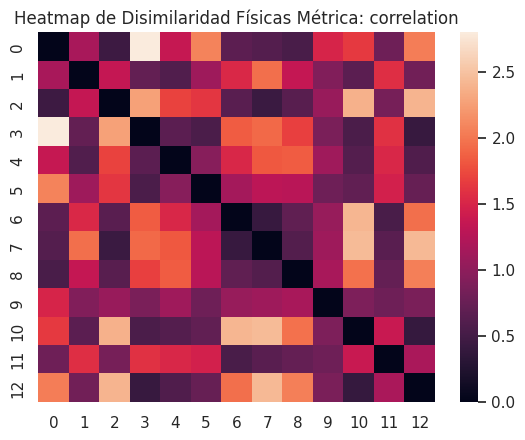

In [ ]:
from scipy.spatial.distance import pdist, squareform
matriz_disimilaridad = pdist(scaled_datafisica, metric='braycurtis')#elegido braycurtis
matriz_completa = squareform(matriz_disimilaridad)
hmfisica = sn.heatmap(matriz_completa)
hmfisica.set_title(f"Heatmap de Disimilaridad Físicas Métrica: {metrica}")
plt.show()

####Antro

In [ ]:
scalarantro=preprocessing.StandardScaler()
scaled_dataantro=pd.DataFrame(scalarantro.fit_transform(featuresantro))


In [ ]:
for metrica in metricas:
    matriz_disimilaridadantro = pdist(scaled_dataantro, metric=metrica)
    matriz_completaantro = squareform(matriz_disimilaridadantro)
    hmantro = sn.heatmap(matriz_completaantro)
    hmantro.set_title(f"Heatmap de Disimilaridad Antropométricas Métrica: {metrica}") #seleccionada euclidean
    plt.show()

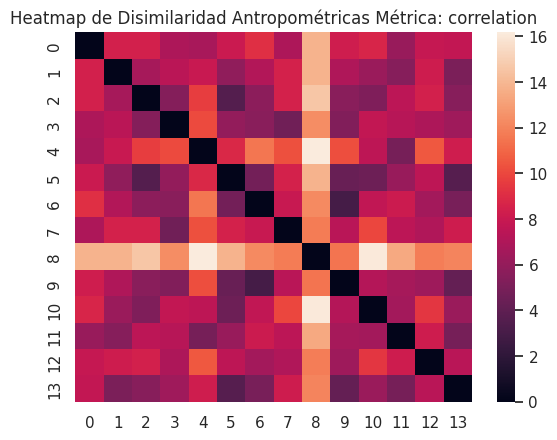

In [ ]:
matriz_disimilaridadantro = pdist(scaled_dataantro, metric='euclidean')
matriz_completaantro = squareform(matriz_disimilaridadantro)
hmantro = sn.heatmap(matriz_completaantro)
hmantro.set_title(f"Heatmap de Disimilaridad Antropométricas Métrica: {metrica}") #seleccionada euclidean
plt.show()

###PCA

#### Físicas

In [ ]:
from sklearn import preprocessing
scalar=preprocessing.StandardScaler()
scaled_data=pd.DataFrame(scalar.fit_transform(featuresfisica))
from sklearn.decomposition import PCA   
labels = fisica['Desempeño']
# Hacer PCA para obtener una cantidad indicada de componentes principales
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pcafisica = pca.transform(scaled_data)
sn.scatterplot(x=data_pcafisica[:,0], y=data_pcafisica[:,1],hue = labels)
plt.xlabel("comp1")
plt.ylabel("comp2")
Z = pca.fit_transform(data_pcafisica)
matriz_disimilaridadpca = pdist(Z, metric='chebyshev')
matriz_completapca = squareform(matriz_disimilaridadpca)
hmfisicapca = sn.heatmap(matriz_completapca)
hmfisicapca.set_title(f"Heatmap de Disimilaridad PCA Físicas Métrica: {metrica}")
plt.show()

Text(0, 0.5, 'comp2')

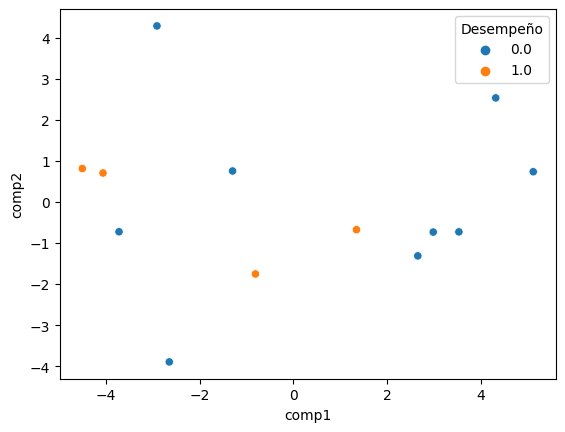

In [ ]:
from sklearn.decomposition import PCA   
labels = fisica['Desempeño']
# Hacer PCA para obtener una cantidad indicada de componentes principales
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pcafisica = pca.transform(scaled_data)
sn.scatterplot(x=data_pcafisica[:,0], y=data_pcafisica[:,1],hue = labels)
plt.xlabel("comp1")
plt.ylabel("comp2")

In [ ]:
#selccionada chebyshev
for metrica in metricas:
    Z = pca.fit_transform(data_pcafisica)
    matriz_disimilaridadpca = pdist(Z, metric=metrica)
    matriz_completapca = squareform(matriz_disimilaridadpca)
    hmfisicapca = sn.heatmap(matriz_completapca)
    hmfisicapca.set_title(f"Heatmap de Disimilaridad PCA Físicas Métrica: {metrica}")
    plt.show()

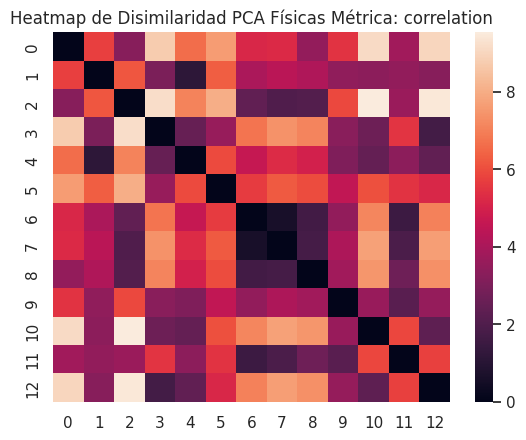

In [ ]:
Z = pca.fit_transform(data_pcafisica)
matriz_disimilaridadpca = pdist(Z, metric='chebyshev')
matriz_completapca = squareform(matriz_disimilaridadpca)
hmfisicapca = sn.heatmap(matriz_completapca)
hmfisicapca.set_title(f"Heatmap de Disimilaridad PCA Físicas Métrica: {metrica}")
plt.show()

####Antro

Text(0, 0.5, 'comp2')

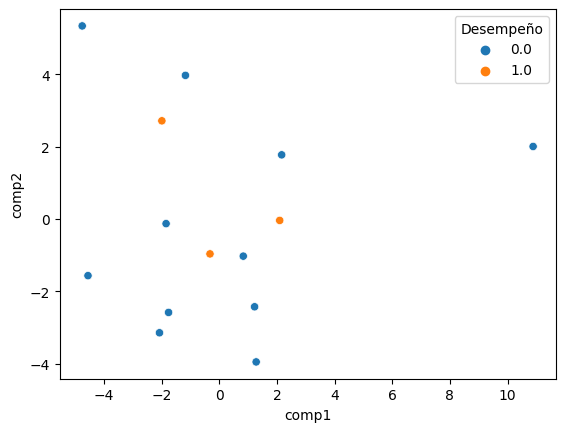

In [ ]:
from sklearn.decomposition import PCA   
labels = antro['Desempeño']
# Hacer PCA para obtener una cantidad indicada de componentes principales
pca = PCA(n_components = 3)
pca.fit(scaled_dataantro)
data_pcaantro = pca.transform(scaled_dataantro)
sn.scatterplot(x=data_pcaantro[:,0], y=data_pcaantro[:,1],hue = labels)
plt.xlabel("comp1")
plt.ylabel("comp2")

In [ ]:
for metrica in metricas:
    Z = pca.fit_transform(data_pcaantro)
    matriz_dispcaantro = pdist(Z, metric=metrica)
    matriz_pcaantro = squareform(matriz_dispcaantro)
    hmantropca = sn.heatmap(matriz_pcaantro)
    hmantropca.set_title(f"Heatmap de Disimilaridad PCA Físicas Métrica: {metrica}")#seleccionado euclidean
    plt.show()


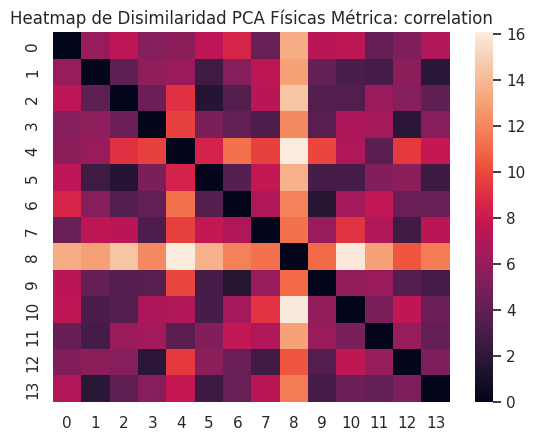

In [ ]:
Z = pca.fit_transform(data_pcaantro)
matriz_dispcaantro = pdist(Z, metric='euclidean')
matriz_pcaantro = squareform(matriz_dispcaantro)
hmantropca = sn.heatmap(matriz_pcaantro)
hmantropca.set_title(f"Heatmap de Disimilaridad PCA Físicas Métrica: {metrica}")#seleccionado euclidean
plt.show()

###PCA 3D

####Físicas

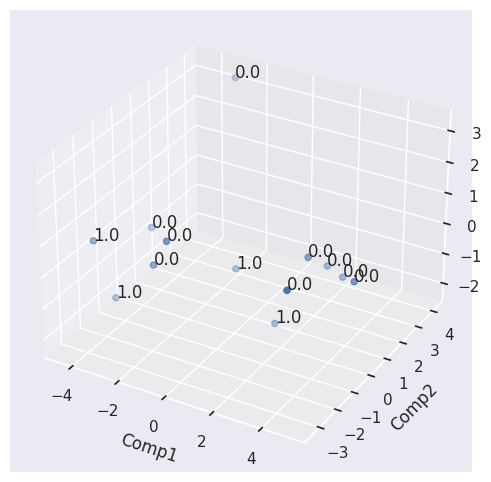

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
sn.set(style = "darkgrid")
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
x=data_pcafisica[:,0]
y=data_pcafisica[:,1]
z=data_pcafisica[:,2]
ax.set_xlabel("Comp1")
ax.set_ylabel("Comp2")
ax.set_zlabel("Comp3")

ax.scatter3D(x,y,z)

columna_etiquetas = fisica['Desempeño']
for i in range(len(data_pcafisica)):
    etiqueta = columna_etiquetas[i]
    x = data_pcafisica[i, 0]
    y = data_pcafisica[i, 1]
    z = data_pcafisica[i, 2]
    ax.text(x, y, z, etiqueta)
plt.show()

####Antro

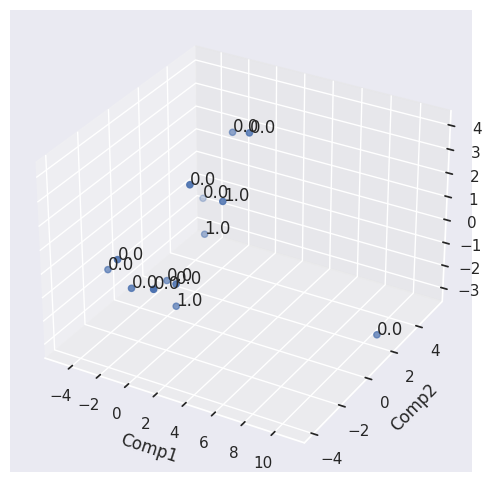

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
sn.set(style = "darkgrid")
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
x=data_pcaantro[:,0]
y=data_pcaantro[:,1]
z=data_pcaantro[:,2]
ax.set_xlabel("Comp1")
ax.set_ylabel("Comp2")
ax.set_zlabel("Comp3")

ax.scatter3D(x,y,z)
columna_etiquetas = antro['Desempeño']
for i in range(len(data_pcaantro)):
    etiqueta = columna_etiquetas[i]
    x = data_pcaantro[i, 0]
    y = data_pcaantro[i, 1]
    z = data_pcaantro[i, 2]
    ax.text(x, y, z, etiqueta)
plt.show()

###KPCA

####rbf

In [ ]:
from sklearn.decomposition import KernelPCA
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform


In [ ]:


for metrica in metricas:
    Kernel_pca = KernelPCA(kernel= "rbf",n_components=3)# extracts 2 features, specify the kernel as rbf
    scaled_data2=scaled_data.iloc[0:15,:] #aqui eliminamos al sujeto de etiqueta 2
    Z = Kernel_pca.fit_transform(scaled_data2)
    matriz_disimilaridadkpca = pdist(Z, metric=metrica) #seleccionada correlacion
    matriz_completakpca = squareform(matriz_disimilaridadkpca)
    hmfisicakpca = sn.heatmap(matriz_completakpca)
    hmfisicakpca.set_title(f"Heatmap de Disimilaridad KPCA rbf Físicas Métrica: {metrica}")
    plt.show()

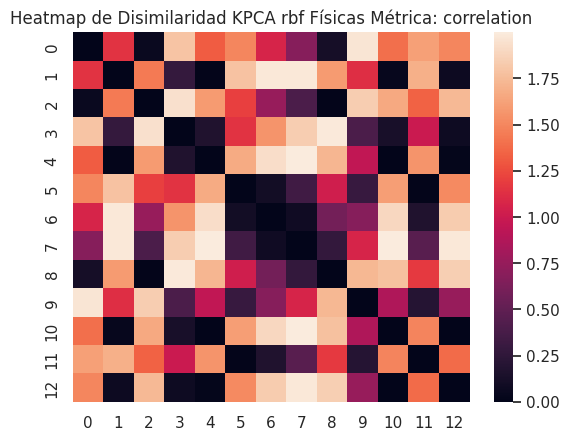

In [ ]:
Kernel_pca = KernelPCA(kernel= "rbf",n_components=3)# extracts 2 features, specify the kernel as rbf
Z = Kernel_pca.fit_transform(scaled_data2)
matriz_disimilaridadkpca = pdist(Z, metric='correlation') #seleccionada correlacion
matriz_completakpca = squareform(matriz_disimilaridadkpca)
hmfisicakpca = sn.heatmap(matriz_completakpca)
hmfisicakpca.set_title(f"Heatmap de Disimilaridad KPCA rbf Físicas Métrica: {metrica}")
plt.show()

<Axes: >

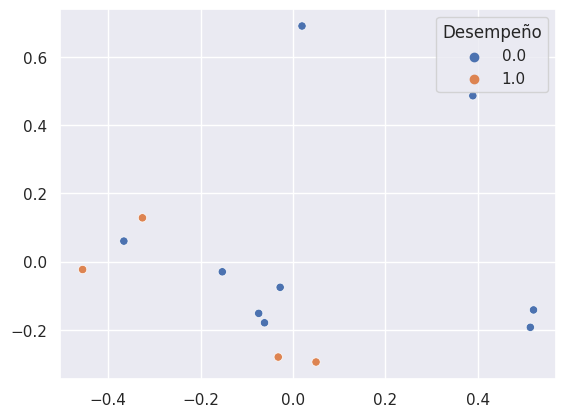

In [ ]:
featuresfisica = x_fisica.iloc[:, 4:64] #si quisiera extraerse directamente columnas
featuresfisica=featuresfisica.dropna()
labels = fisica['Desempeño'] 
#labels2=labels.
sn.scatterplot(x=Z[:, 1], y=Z[:, 2],hue=labels)
#plt.xlabel("caract 1")
#plt.ylabel("carct 2")

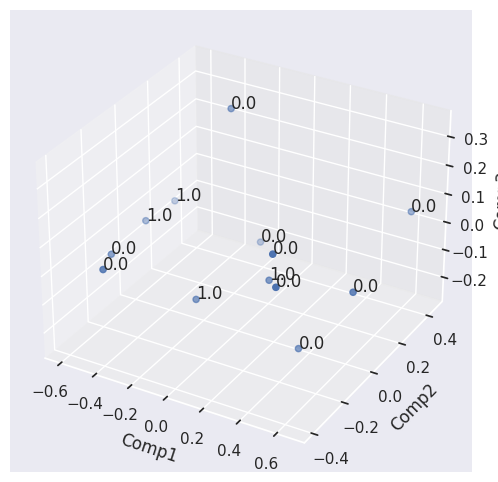

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
sn.set(style = "darkgrid")
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
x=Z[:,0]
y=Z[:,1]
z=Z[:,2]
ax.set_xlabel("Comp1")
ax.set_ylabel("Comp2")
ax.set_zlabel("Comp3")

ax.scatter3D(x,y,z)

columna_etiquetas = fisica['Desempeño']
for i in range(len(Z)):
    etiqueta = columna_etiquetas[i]
    x = Z[i, 0]
    y = Z[i, 1]
    z = Z[i, 2]
    ax.text(x, y, z, etiqueta)

plt.show()

####Kernel sigmoid

In [ ]:

for metrica in metricas:
    Kernel_pca = KernelPCA(kernel= "sigmoid",n_components=3)# extracts 2 features, specify the kernel as rbf
    scaled_data2=scaled_data.iloc[0:15,:] #aqui eliminamos al sujeto de etiqueta 2
    Z = Kernel_pca.fit_transform(scaled_data2)
    matriz_disimilaridadkpca = pdist(Z, metric=metrica) #seleccionada chebyshev
    matriz_completakpca = squareform(matriz_disimilaridadkpca)
    hmfisicakpca = sn.heatmap(matriz_completakpca)
    hmfisicakpca.set_title(f"Heatmap de Disimilaridad KPCA sigmoid Físicas Métrica: {metrica}")
    plt.show()

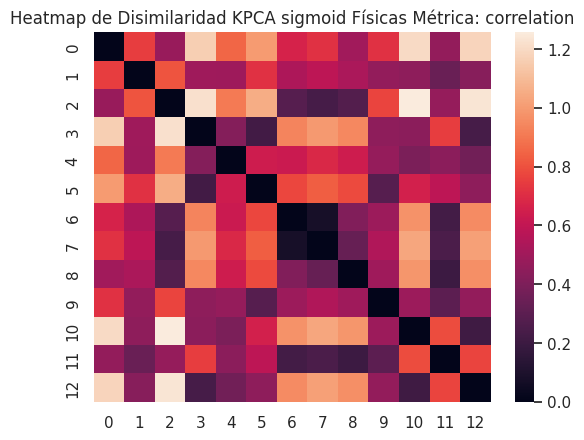

In [ ]:
Kernel_pca = KernelPCA(kernel= "sigmoid",n_components=3)# extracts 2 features, specify the kernel as rbf
scaled_data2=scaled_data.iloc[0:15,:] #aqui eliminamos al sujeto de etiqueta 2
Z = Kernel_pca.fit_transform(scaled_data2)
matriz_disimilaridadkpca = pdist(Z, metric='chebyshev') #seleccionada chebyshev
matriz_completakpca = squareform(matriz_disimilaridadkpca)
hmfisicakpca = sn.heatmap(matriz_completakpca)
hmfisicakpca.set_title(f"Heatmap de Disimilaridad KPCA sigmoid Físicas Métrica: {metrica}")
plt.show()

<Axes: >

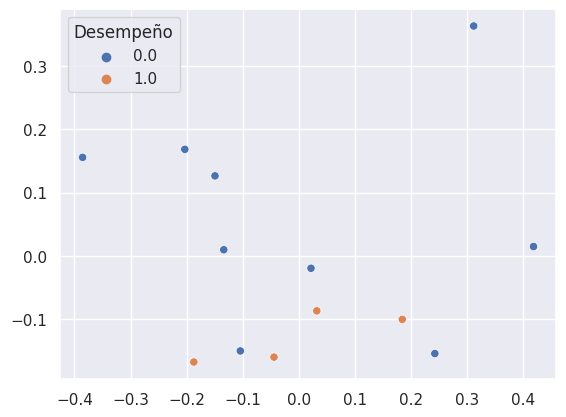

In [ ]:
featuresfisica = x_fisica.iloc[:, 4:64] #si quisiera extraerse directamente columnas
featuresfisica=featuresfisica.dropna()
labels = fisica['Desempeño'] 
#labels2=labels.

sn.scatterplot(x=Z[:, 1], y=Z[:, 2],hue=labels)
#plt.xlabel("caract 1")
#plt.ylabel("carct 2")

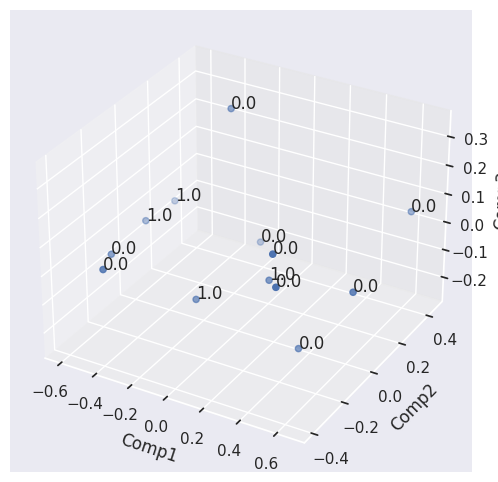

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
sn.set(style = "darkgrid")
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
x=Z[:,0]
y=Z[:,1]
z=Z[:,2]
ax.set_xlabel("Comp1")
ax.set_ylabel("Comp2")
ax.set_zlabel("Comp3")

ax.scatter3D(x,y,z)

columna_etiquetas = fisica['Desempeño']
for i in range(len(Z)):
    etiqueta = columna_etiquetas[i]
    x = Z[i, 0]
    y = Z[i, 1]
    z = Z[i, 2]
    ax.text(x, y, z, etiqueta)
plt.show()

#### Poly

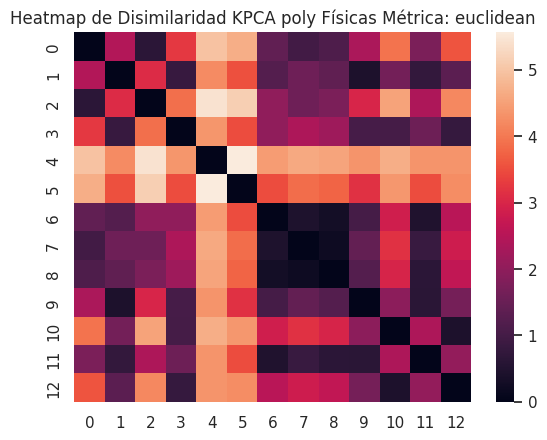

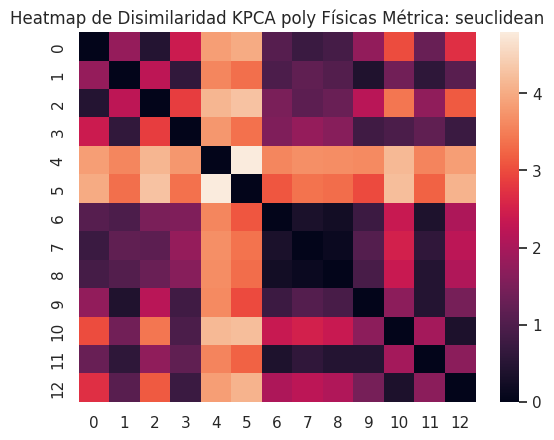

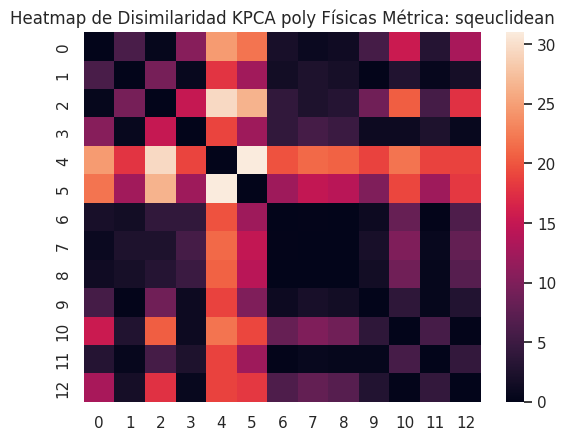

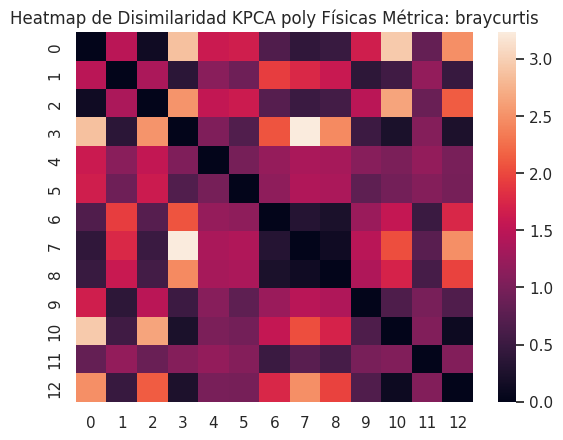

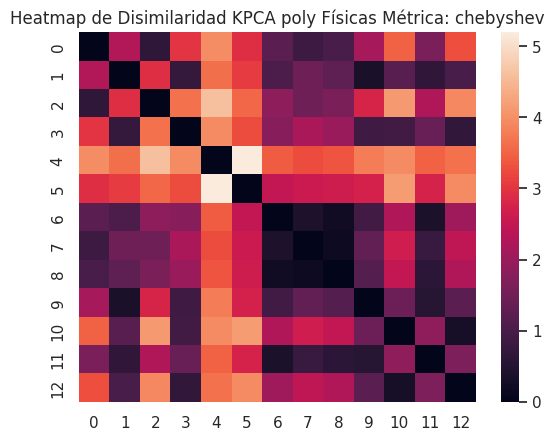

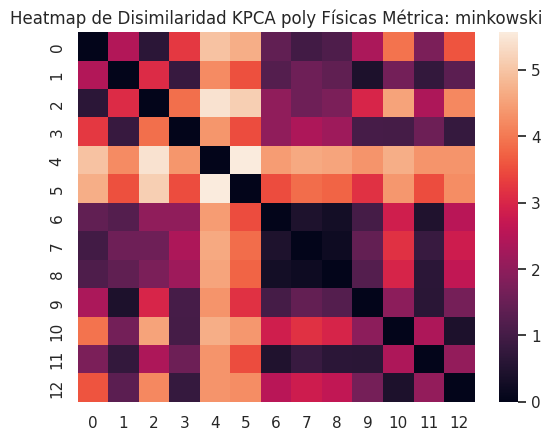

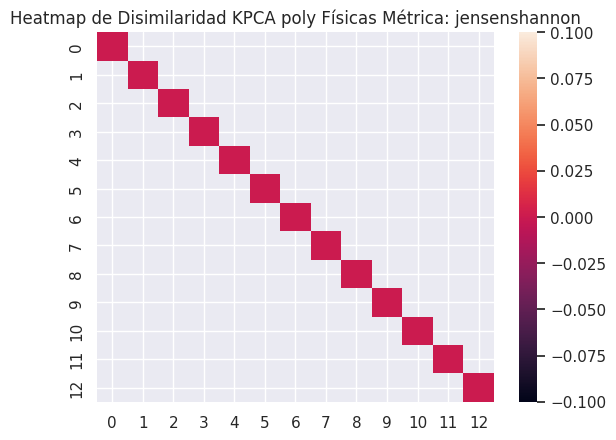

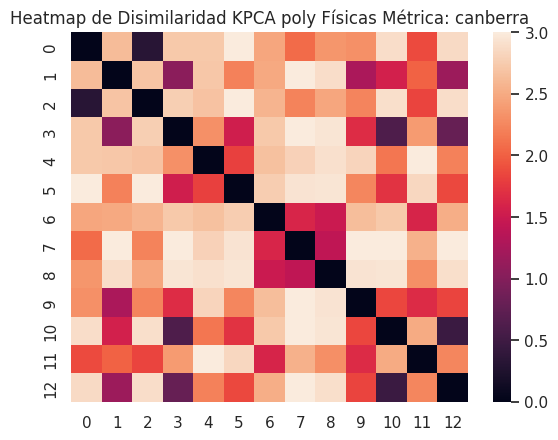

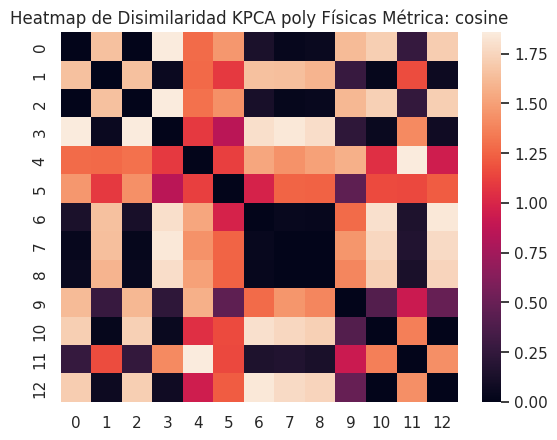

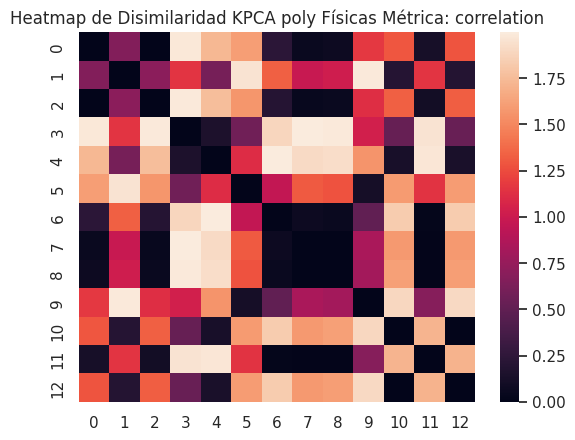

In [ ]:

for metrica in metricas:
    Kernel_pca = KernelPCA(kernel= "poly",n_components=3)# extracts 2 features, specify the kernel as rbf
    Z = Kernel_pca.fit_transform(scaled_data2)
    matriz_disimilaridadkpca = pdist(Z, metric=metrica) #seleccionada chebyshev
    matriz_completakpca = squareform(matriz_disimilaridadkpca)
    hmfisicakpca = sn.heatmap(matriz_completakpca)
    hmfisicakpca.set_title(f"Heatmap de Disimilaridad KPCA poly Físicas Métrica: {metrica}")
    plt.show()

<Axes: >

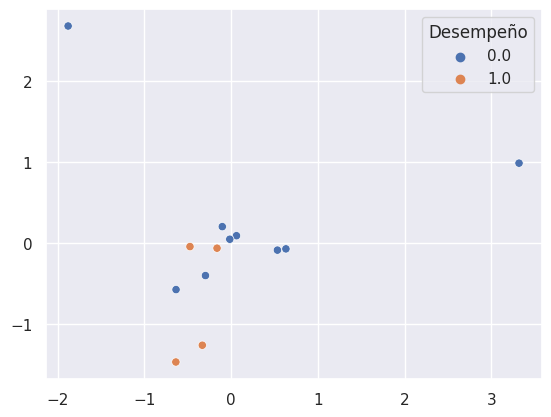

In [ ]:
featuresfisica = x_fisica.iloc[:, 4:64] #si quisiera extraerse directamente columnas
featuresfisica=featuresfisica.dropna()
labels = fisica['Desempeño'] 
#labels2=labels.

sn.scatterplot(x=Z[:, 1], y=Z[:, 2],hue=labels)
#plt.xlabel("caract 1")
#plt.ylabel("carct 2")

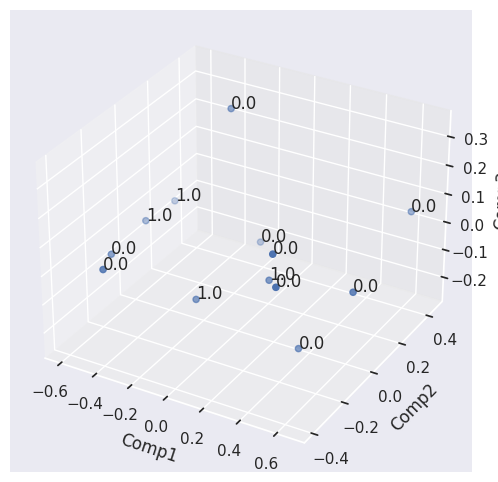

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
sn.set(style = "darkgrid")
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
x=Z[:,0]
y=Z[:,1]
z=Z[:,2]
ax.set_xlabel("Comp1")
ax.set_ylabel("Comp2")
ax.set_zlabel("Comp3")

ax.scatter3D(x,y,z)

columna_etiquetas = fisica['Desempeño']
for i in range(len(Z)):
    etiqueta = columna_etiquetas[i]
    x = Z[i, 0]
    y = Z[i, 1]
    z = Z[i, 2]
    ax.text(x, y, z, etiqueta)
plt.show()

#### Cosine

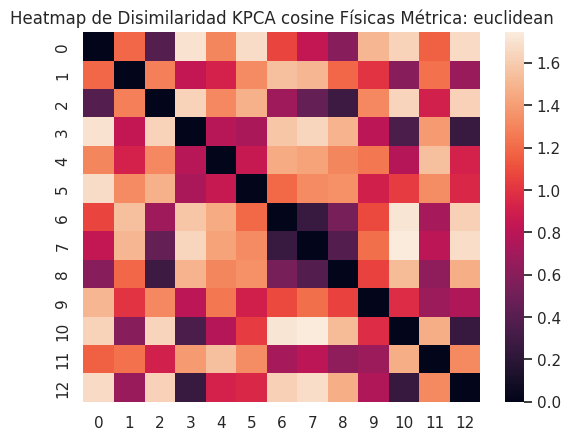

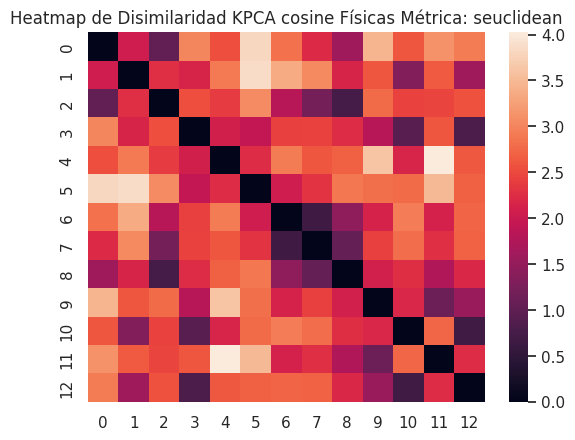

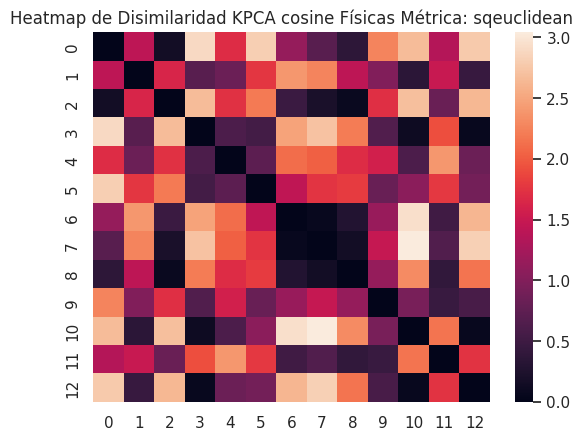

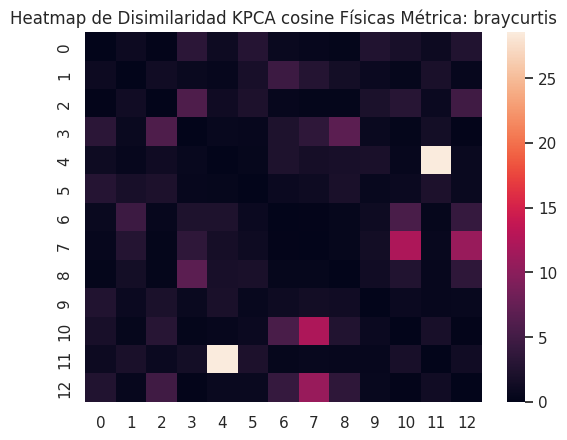

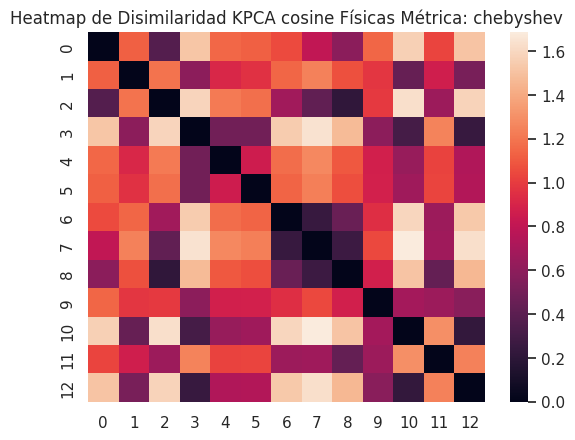

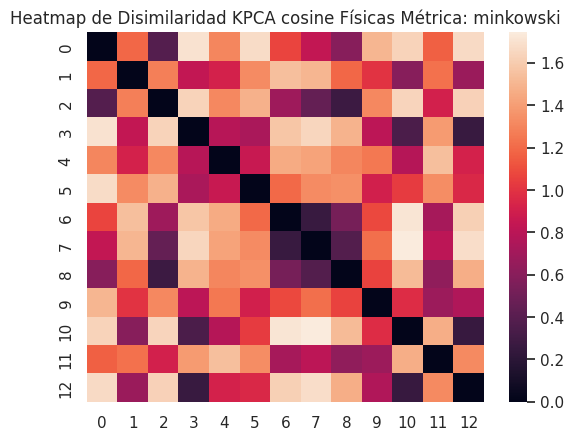

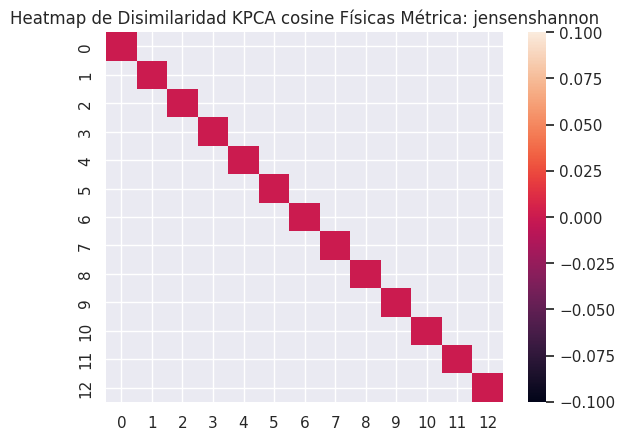

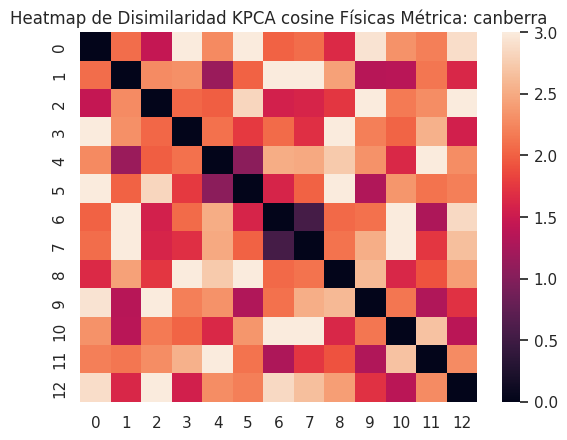

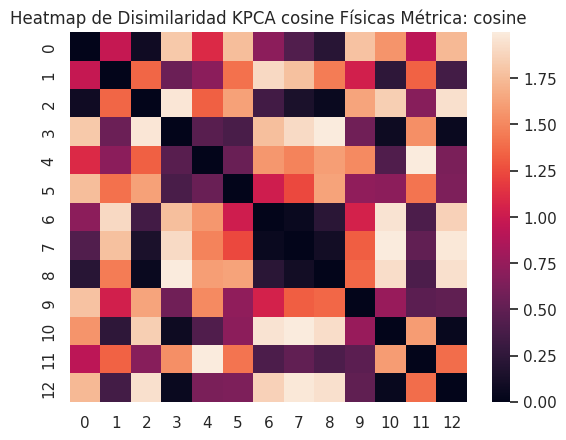

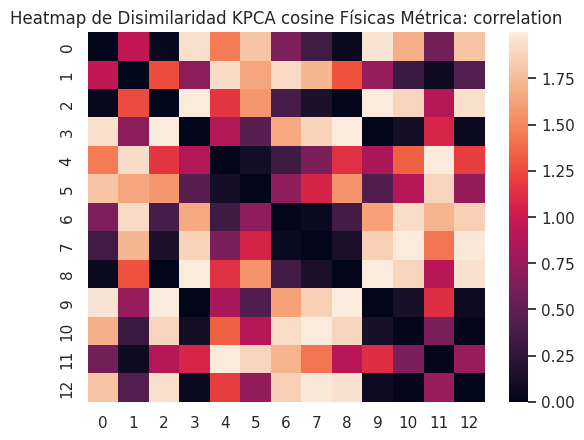

In [ ]:

for metrica in metricas:
    Kernel_pca = KernelPCA(kernel= "cosine",n_components=3)# extracts 2 features, specify the kernel as rbf
    Z = Kernel_pca.fit_transform(scaled_data2)
    matriz_disimilaridadkpca = pdist(Z, metric=metrica) #seleccionada correlacion
    matriz_completakpca = squareform(matriz_disimilaridadkpca)
    hmfisicakpca = sn.heatmap(matriz_completakpca)
    hmfisicakpca.set_title(f"Heatmap de Disimilaridad KPCA cosine Físicas Métrica: {metrica}")
    plt.show()

<Axes: >

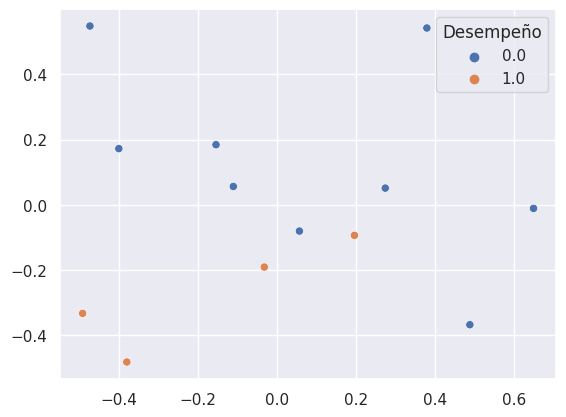

In [ ]:
featuresfisica = x_fisica.iloc[:, 4:64] #si quisiera extraerse directamente columnas
featuresfisica=featuresfisica.dropna()
labels = fisica['Desempeño'] 
#labels2=labels.

sn.scatterplot(x=Z[:, 1], y=Z[:, 2],hue=labels)
#plt.xlabel("caract 1")
#plt.ylabel("carct 2")

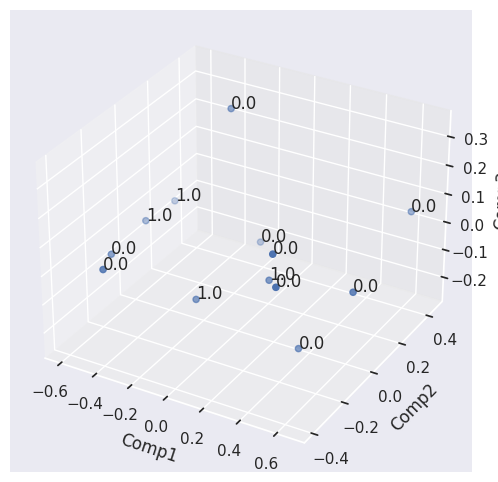

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
sn.set(style = "darkgrid")
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
x=Z[:,0]
y=Z[:,1]
z=Z[:,2]
ax.set_xlabel("Comp1")
ax.set_ylabel("Comp2")
ax.set_zlabel("Comp3")

ax.scatter3D(x,y,z)

columna_etiquetas = fisica['Desempeño']
for i in range(len(Z)):
    etiqueta = columna_etiquetas[i]
    x = Z[i, 0]
    y = Z[i, 1]
    z = Z[i, 2]
    ax.text(x, y, z, etiqueta)
plt.show()

####linear

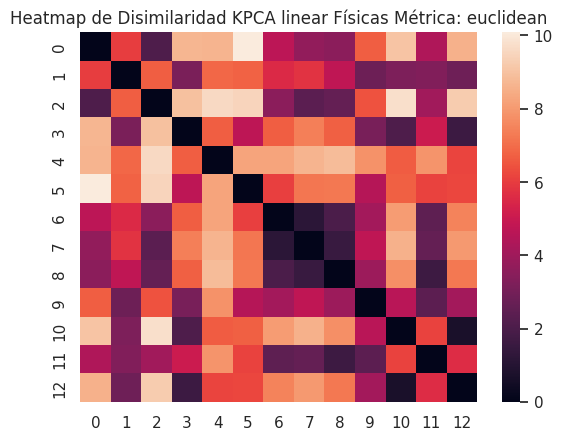

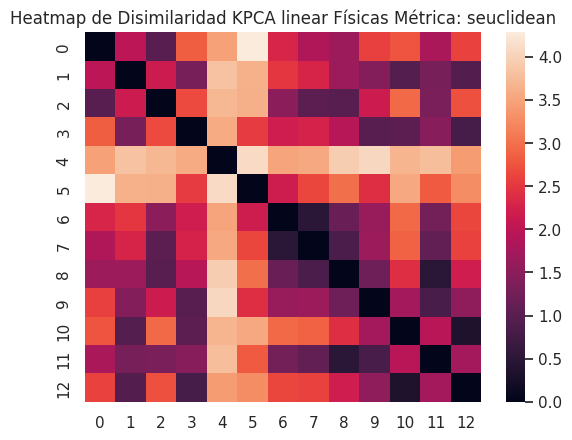

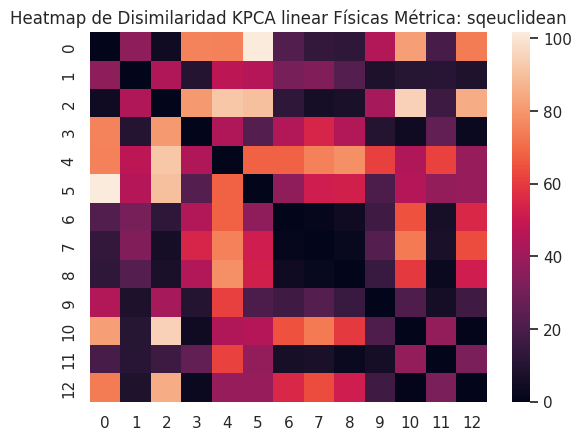

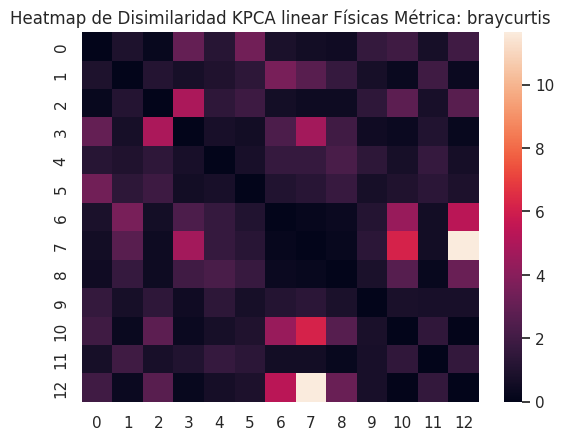

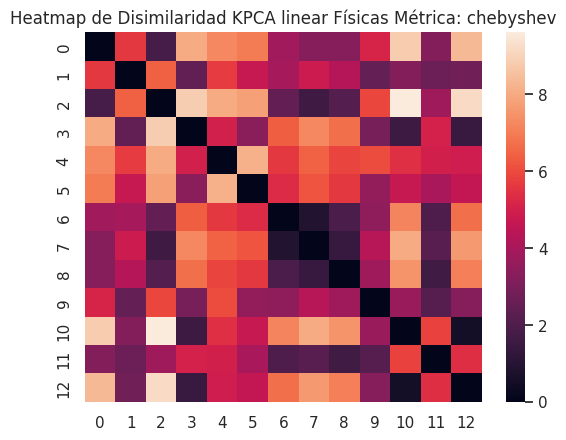

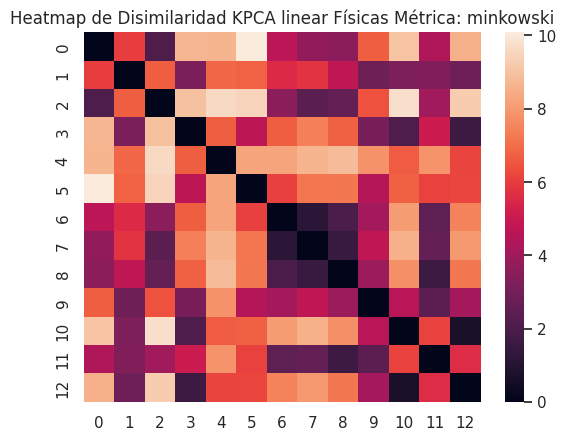

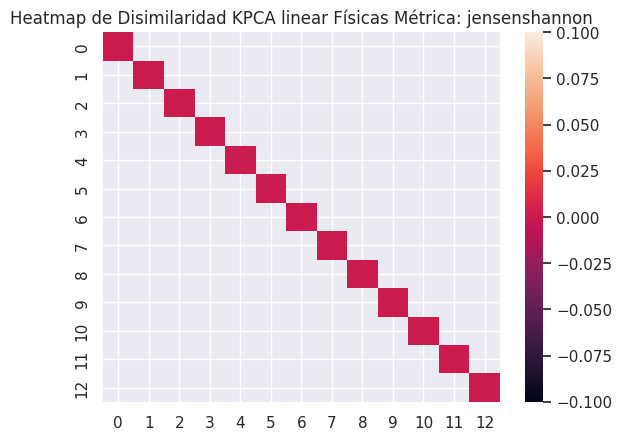

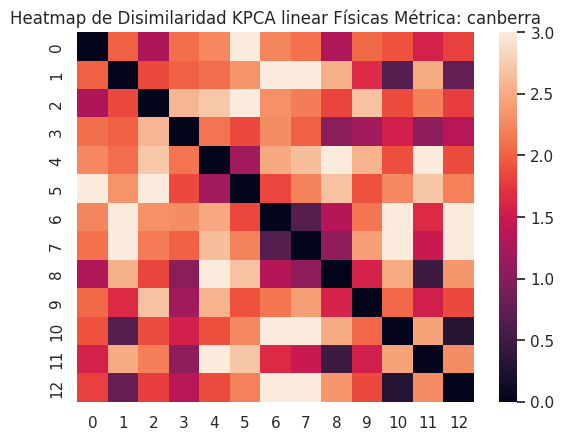

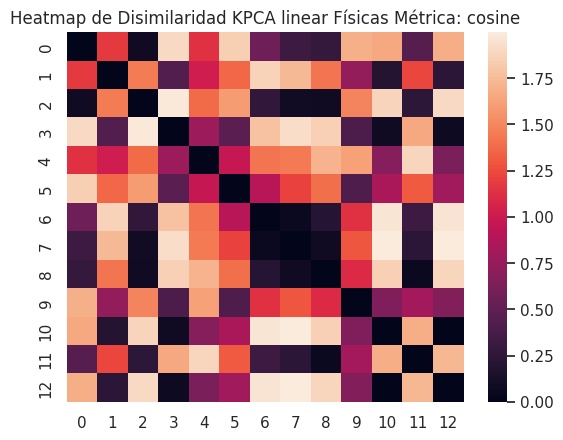

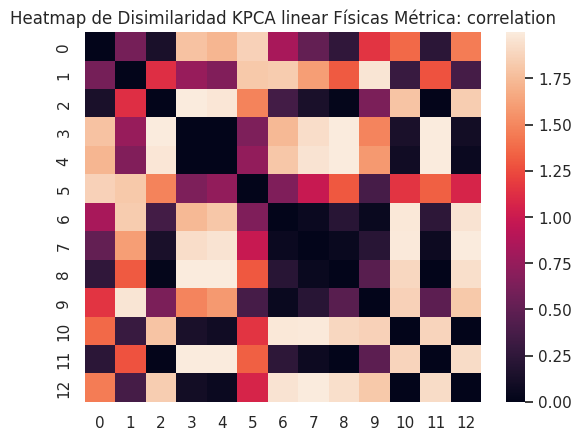

In [ ]:

for metrica in metricas:
    Kernel_pca = KernelPCA(kernel= "linear",n_components=3)# extracts 2 features, specify the kernel as rbf
    Z = Kernel_pca.fit_transform(scaled_data2)
    matriz_disimilaridadkpca = pdist(Z, metric=metrica) #seleccionada chebyshev
    matriz_completakpca = squareform(matriz_disimilaridadkpca)
    hmfisicakpca = sn.heatmap(matriz_completakpca)
    hmfisicakpca.set_title(f"Heatmap de Disimilaridad KPCA linear Físicas Métrica: {metrica}")
    plt.show()

<Axes: >

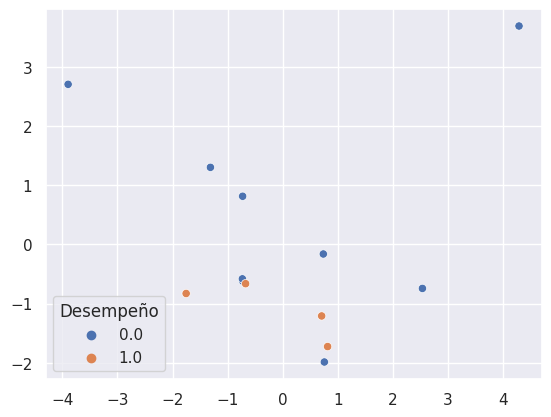

In [ ]:
featuresfisica = x_fisica.iloc[:, 4:64] #si quisiera extraerse directamente columnas
featuresfisica=featuresfisica.dropna()
labels = fisica['Desempeño'] 
#labels2=labels.

sn.scatterplot(x=Z[:, 1], y=Z[:, 2],hue=labels)
#plt.xlabel("caract 1")
#plt.ylabel("carct 2")

1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

[[9 0]
 [0 4]]


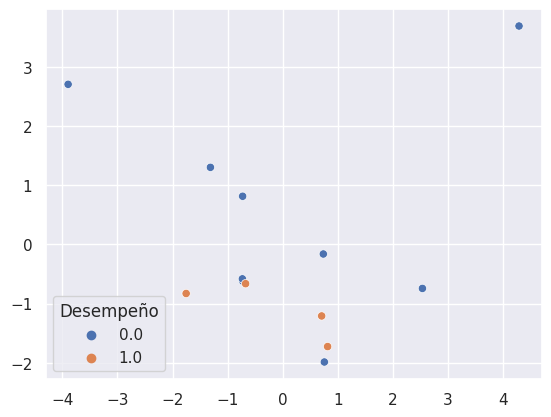

In [ ]:
sn.scatterplot(x=Z[:, 1], y=Z[:, 2],hue=labels)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Z, labels)
y_pred = neigh.predict(Z)
print(accuracy_score(labels,y_pred))
print(classification_report(labels,y_pred))
print(confusion_matrix(labels,y_pred))

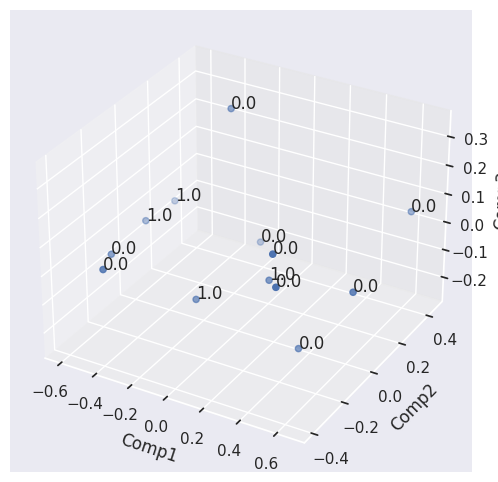

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
sn.set(style = "darkgrid")
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
x=Z[:,0]
y=Z[:,1]
z=Z[:,2]
ax.set_xlabel("Comp1")
ax.set_ylabel("Comp2")
ax.set_zlabel("Comp3")

ax.scatter3D(x,y,z)

columna_etiquetas = fisica['Desempeño']
for i in range(len(Z)):
    etiqueta = columna_etiquetas[i]
    x = Z[i, 0]
    y = Z[i, 1]
    z = Z[i, 2]
    ax.text(x, y, z, etiqueta)
plt.show()

#Kernel Rbf


In [ ]:
for metrica in metricas:
    Kernel_pca = KernelPCA(kernel= "rbf",n_components=3)# extracts 2 features, specify the kernel as rbf
    scaled_data2=scaled_data.iloc[0:15,:] #aqui eliminamos al sujeto de etiqueta 2
    Z = pca.fit_transform(data_pcaantro)
    matriz_diskpcaantro = pdist(Z, metric=metrica)
    matriz_kpcaantro = squareform(matriz_diskpcaantro)
    hmantrokpca = sn.heatmap(matriz_kpcaantro)
    hmantropca.set_title(f"Heatmap de Disimilaridad KPCA Antropométricas Métrica: {metrica}")
    plt.show()

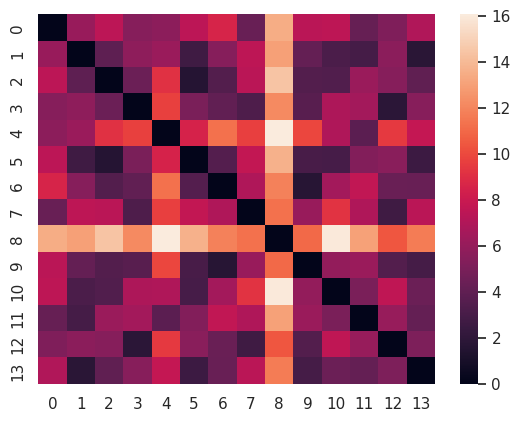

In [ ]:
Kernel_pca = KernelPCA(kernel= "rbf",n_components=3)# extracts 2 features, specify the kernel as rbf
scaled_data2=scaled_data.iloc[0:15,:] #aqui eliminamos al sujeto de etiqueta 2
Z = pca.fit_transform(data_pcaantro)
matriz_diskpcaantro = pdist(Z, metric='euclidean')
matriz_kpcaantro = squareform(matriz_diskpcaantro)
hmantrokpca = sn.heatmap(matriz_kpcaantro)
hmantropca.set_title(f"Heatmap de Disimilaridad KPCA Antropométricas Métrica: {metrica}")
plt.show()

In [ ]:
featuresantro = x_antro.iloc[:, 4:64] #si quisiera extraerse directamente columnas
featuresantro=featuresantro.dropna()
labels = antro['Desempeño'] 
#labels2=labels.

sn.scatterplot(x=Z[:, 1], y=Z[:, 2],hue=labels)
#plt.xlabel("caract 1")
#plt.ylabel("carct 2")

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
sn.set(style = "darkgrid")
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
x=Z[:,0]
y=Z[:,1]
z=Z[:,2]
ax.set_xlabel("Comp1")
ax.set_ylabel("Comp2")
ax.set_zlabel("Comp3")

ax.scatter3D(x,y,z)
columna_etiquetas = fisica['Desempeño']
for i in range(len(Z)):
    etiqueta = columna_etiquetas[i]
    x = Z[i, 0]
    y = Z[i, 1]
    z = Z[i, 2]
    ax.text(x, y, z, etiqueta)
plt.show()

## Sigma gamma

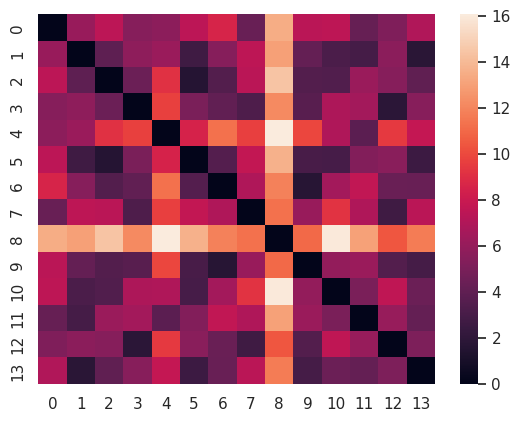

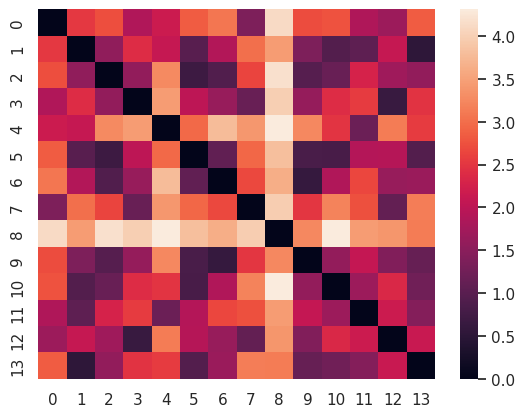

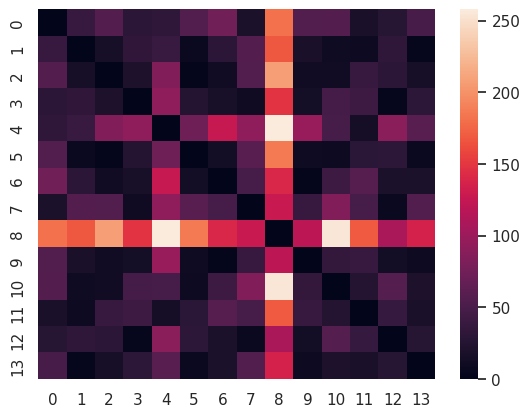

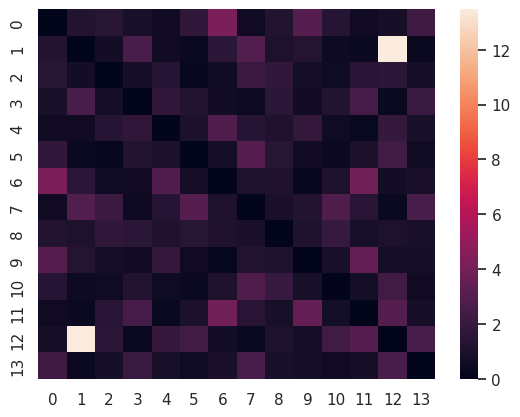

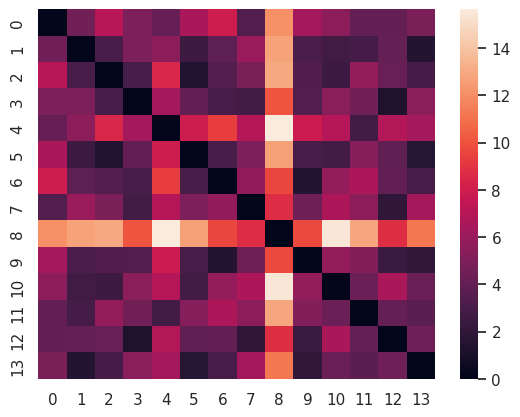

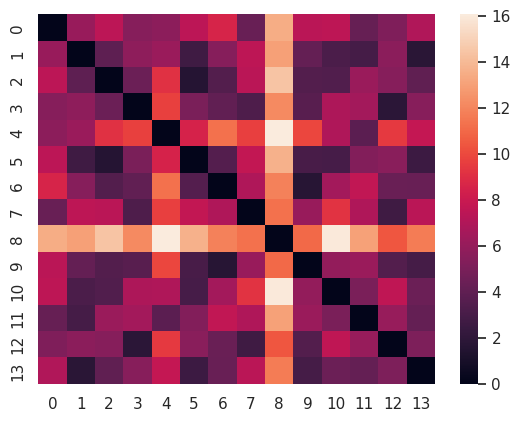

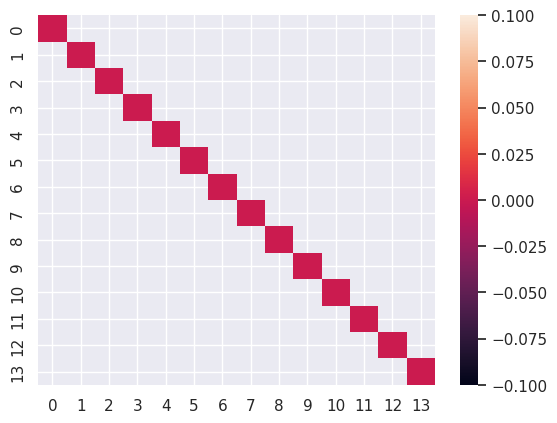

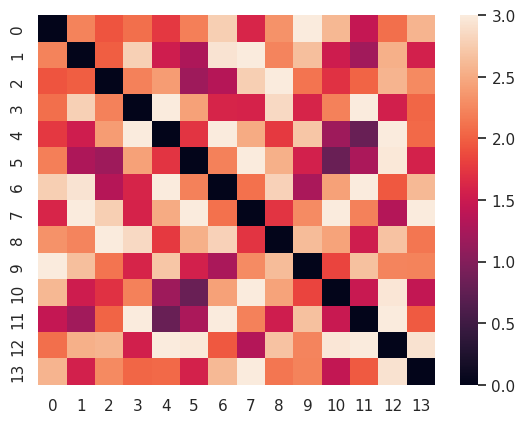

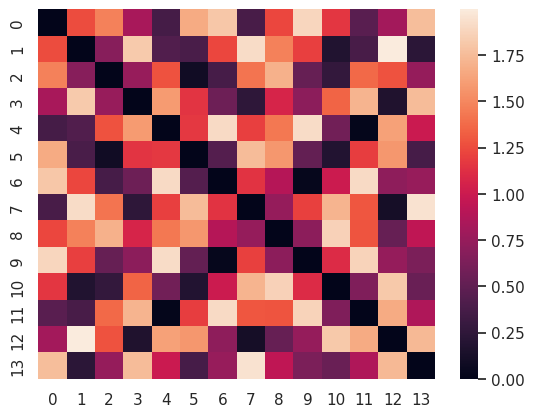

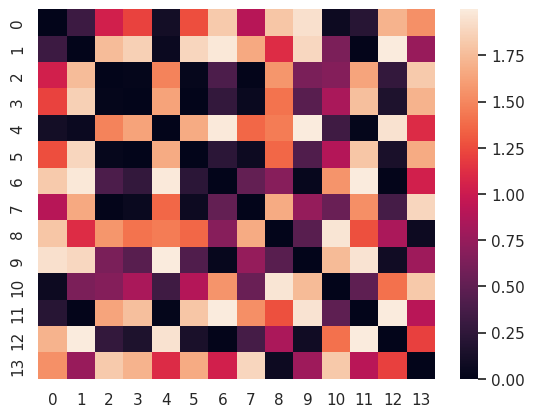

In [ ]:
for metrica in metricas:
      gamma =1.0
      Kernel_pca = KernelPCA(kernel= "rbf", gamma = gamma, n_components=3)# extracts 2 features, specify the kernel as rbf
      scaled_data2=scaled_data.iloc[0:15,:] #aqui eliminamos al sujeto de etiqueta 2
      Z = pca.fit_transform(data_pcaantro)
      matriz_diskpcaantro = pdist(Z, metric=metrica)
      matriz_kpcaantro = squareform(matriz_diskpcaantro)
      hmantrokpca = sn.heatmap(matriz_kpcaantro)
      hmantropca.set_title(f"Heatmap de Disimilaridad KPCA Antropométricas Métrica: {metrica}")
      plt.show()

#Sigmoid

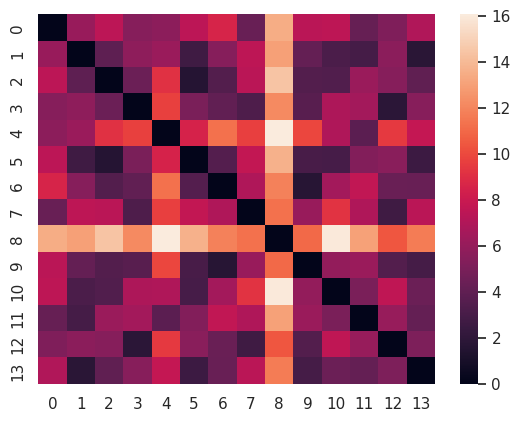

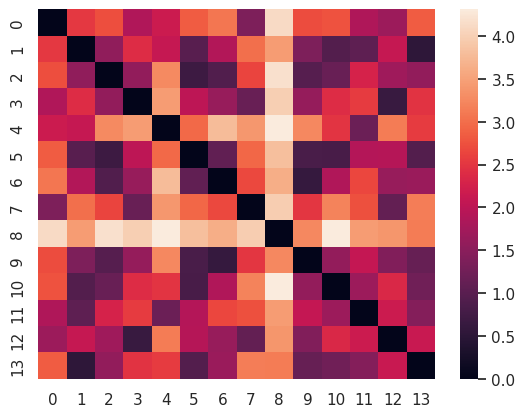

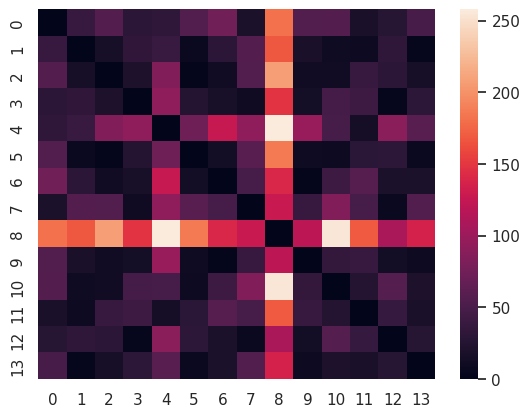

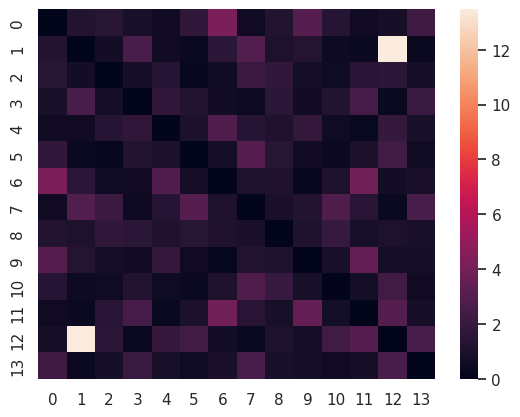

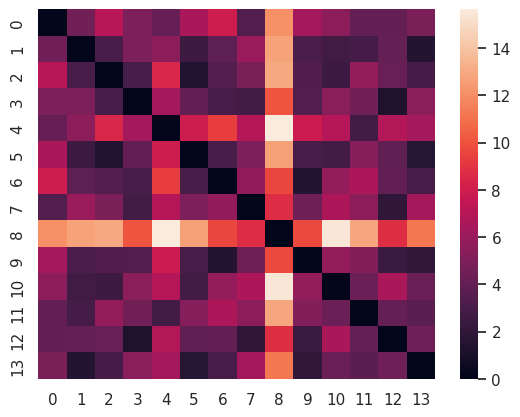

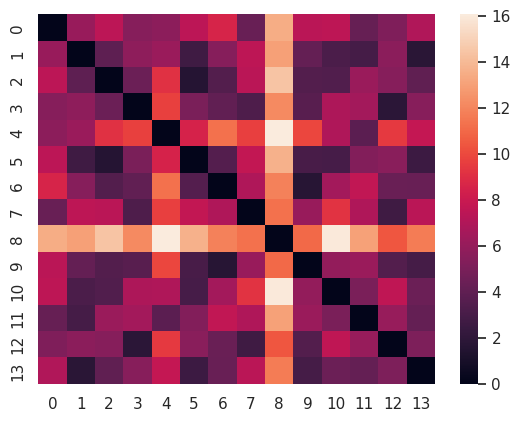

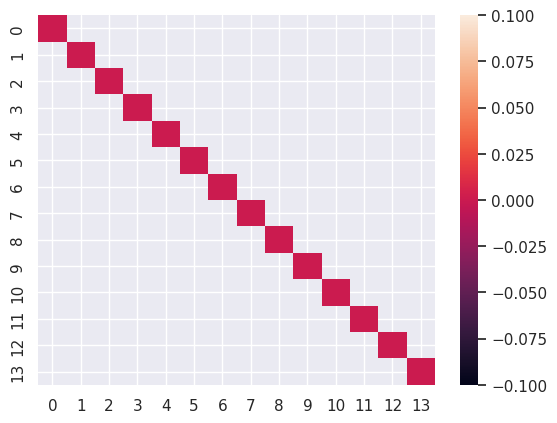

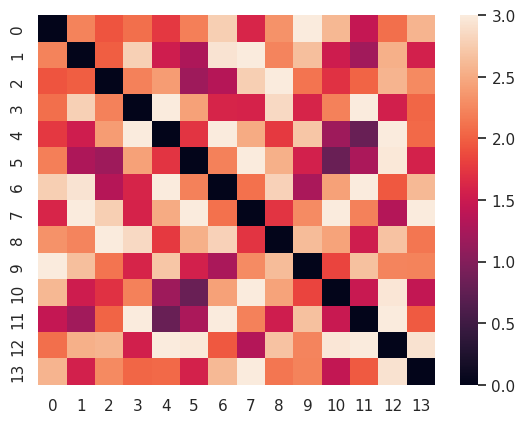

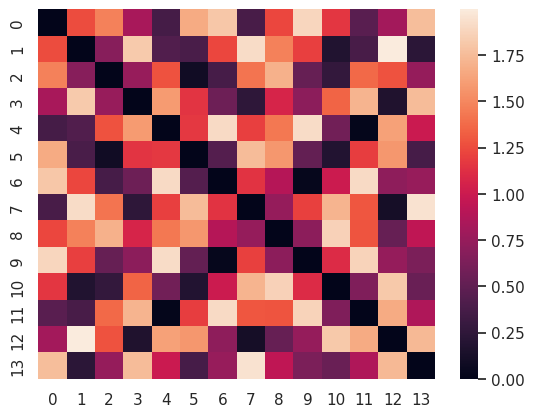

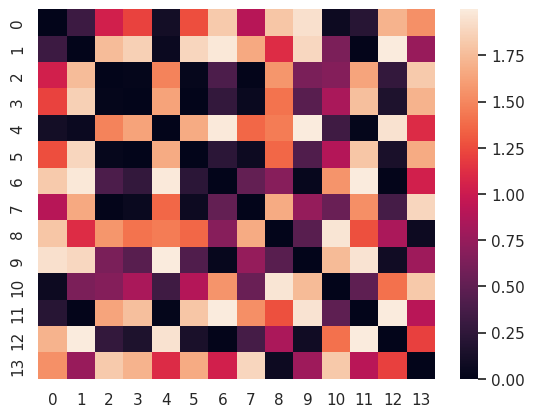

In [ ]:
for metrica in metricas:
    Kernel_pca = KernelPCA(kernel= "sigmaid",n_components=3)# extracts 2 features, specify the kernel as rbf
    scaled_data2=scaled_data.iloc[0:15,:] #aqui eliminamos al sujeto de etiqueta 2
    Z = pca.fit_transform(data_pcaantro)
    matriz_diskpcaantro = pdist(Z, metric=metrica)
    matriz_kpcaantro = squareform(matriz_diskpcaantro)
    hmantrokpca = sn.heatmap(matriz_kpcaantro)
    hmantropca.set_title(f"Heatmap de Disimilaridad KPCA Antropométricas Métrica: {metrica}")
    plt.show()

#Poly

In [ ]:
for metrica in metricas:
    Kernel_pca = KernelPCA(kernel= "poly",n_components=3)# extracts 2 features, specify the kernel as rbf
    scaled_data2=scaled_data.iloc[0:15,:] #aqui eliminamos al sujeto de etiqueta 2
    Z = pca.fit_transform(data_pcaantro)
    matriz_diskpcaantro = pdist(Z, metric=metrica)
    matriz_kpcaantro = squareform(matriz_diskpcaantro)
    hmantrokpca = sn.heatmap(matriz_kpcaantro)
    hmantropca.set_title(f"Heatmap de Disimilaridad KPCA Antropométricas Métrica: {metrica}")
    plt.show()

#Coseno

In [ ]:
for metrica in metricas:
    Kernel_pca = KernelPCA(kernel= "coseno",n_components=3)# extracts 2 features, specify the kernel as rbf
    scaled_data2=scaled_data.iloc[0:15,:] #aqui eliminamos al sujeto de etiqueta 2
    Z = pca.fit_transform(data_pcaantro)
    matriz_diskpcaantro = pdist(Z, metric=metrica)
    matriz_kpcaantro = squareform(matriz_diskpcaantro)
    hmantrokpca = sn.heatmap(matriz_kpcaantro)
    hmantropca.set_title(f"Heatmap de Disimilaridad KPCA Antropométricas Métrica: {metrica}")
    plt.show()

#Linear

In [ ]:
for metrica in metricas:
    Kernel_pca = KernelPCA(kernel= "linear",n_components=3)# extracts 2 features, specify the kernel as rbf
    scaled_data2=scaled_data.iloc[0:15,:] #aqui eliminamos al sujeto de etiqueta 2
    Z = pca.fit_transform(data_pcaantro)
    matriz_diskpcaantro = pdist(Z, metric=metrica)
    matriz_kpcaantro = squareform(matriz_diskpcaantro)
    hmantrokpca = sn.heatmap(matriz_kpcaantro)
    hmantropca.set_title(f"Heatmap de Disimilaridad KPCA Antropométricas Métrica: {metrica}")
    plt.show()